In [0]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import *
import numpy as np
import calendar
import re
from nltk.tokenize import word_tokenize , sent_tokenize
import itertools

import string
import json

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet, LogisticRegression
import sklearn.metrics as metrics
from sklearn.dummy import DummyClassifier, DummyRegressor
import sys

In [2]:
!wget https://www.dropbox.com/sh/zzsjziljp7qz9fq/AAAx-2P_uNIJhDqhFFSCn-Wna/fresh_train_206_5.csv
!wget https://www.dropbox.com/sh/zzsjziljp7qz9fq/AABdxLbVrBc2-X5_8ik-oJMza/fresh_test_206_5.csv

--2019-12-11 02:54:05--  https://www.dropbox.com/sh/zzsjziljp7qz9fq/AAAx-2P_uNIJhDqhFFSCn-Wna/fresh_train_206_5.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/zzsjziljp7qz9fq/AAAx-2P_uNIJhDqhFFSCn-Wna/fresh_train_206_5.csv [following]
--2019-12-11 02:54:05--  https://www.dropbox.com/sh/raw/zzsjziljp7qz9fq/AAAx-2P_uNIJhDqhFFSCn-Wna/fresh_train_206_5.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b742ca3f8c98af5008f90fd34.dl.dropboxusercontent.com/cd/0/inline/AuAOpScw_LVxwYWJ5FFnqPd8koU81ls3gWTYhteIL4_x37IyZjn8qtvqcfFVXWsBKPCn14OOdUXsXAa_s7M-7rYFGR1evyqZ-35uZuxM2KmT4XrXCmMxnQO3xxhibuFRISU/file# [following]
--2019-12-11 02:54:06--  https://uc7b742ca3f8c98af5008f90fd34.dl.dropboxusercontent.com/cd/0/inline/AuAOpS

In [0]:
train = pd.read_csv("fresh_train_206_5.csv",engine='python',error_bad_lines=False)
test = pd.read_csv("fresh_test_206_5.csv",engine='python',error_bad_lines=False)

In [0]:
train_classification_set = train.drop(['state','usd_pledged_real', 'blurbSpellingErrors'],axis=1)
train_classification_target = train['state']
train_regression_set = train.drop(['state','usd_pledged_real'],axis=1)
train_regression_target = train['usd_pledged_real']

test_classification_set = test.drop(['state','usd_pledged_real', 'blurbSpellingErrors'],axis=1)
test_classification_target = test['state']
test_regression_set = test.drop(['state','usd_pledged_real'],axis=1)
test_regression_target = test['usd_pledged_real']

In [5]:
print(train_classification_set.shape)
print(test_classification_set.shape)
print(train_regression_set.shape)
print(test_regression_set.shape)

(55368, 19)
(13842, 19)
(55368, 20)
(13842, 20)


In [0]:
# np.set_printoptions(threshold=sys.maxsize)

In [0]:
train_regression_set_masked = train_regression_set[np.divide(np.exp(train_regression_target)-1,np.exp(train_regression_set.usd_goal_real)-1)>=0.5]
train_regression_target_masked = train_regression_target[np.divide(np.exp(train_regression_target)-1,np.exp(train_regression_set.usd_goal_real)-1)>=0.5]

test_regression_set_masked = test_regression_set[np.divide(np.exp(test_regression_target)-1,np.exp(test_regression_set.usd_goal_real)-1)>=0.5]
test_regression_target_masked = test_regression_target[np.divide(np.exp(test_regression_target)-1,np.exp(test_regression_set.usd_goal_real)-1)>=0.5]

scaler = StandardScaler()
train_regression_set_scaled = scaler.fit_transform(train_regression_set_masked)
train_regression_target_scaled = StandardScaler().fit_transform(train_regression_target_masked.values.reshape(len(train_regression_target_masked),1))[:,0]
test_regression_set_scaled = scaler.fit_transform(test_regression_set_masked)
test_regression_target_scaled = StandardScaler().fit_transform(test_regression_target_masked.values.reshape(len(test_regression_target_masked),1))[:,0]

In [0]:
def plot_roc_curve(model, X_test, y_test):

  # calculate the fpr and tpr for all thresholds of the classification
  probs = model.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)
  
  # method I: plt

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

0.642988729952319
0.6486779367143476
{
  "failed": {
    "precision": 0.0,
    "recall": 0.0,
    "f1-score": 0.0,
    "support": 4863
  },
  "successful": {
    "precision": 0.6486779367143476,
    "recall": 1.0,
    "f1-score": 0.7869067963717629,
    "support": 8979
  },
  "accuracy": 0.6486779367143476,
  "macro avg": {
    "precision": 0.3243389683571738,
    "recall": 0.5,
    "f1-score": 0.39345339818588143,
    "support": 13842
  },
  "weighted avg": {
    "precision": 0.42078306557998313,
    "recall": 0.6486779367143476,
    "f1-score": 0.5104490770569324,
    "support": 13842
  }
}
0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


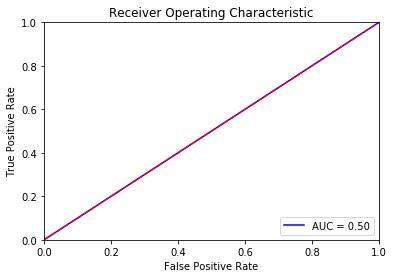

In [9]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_classification_set, train_classification_target)

print(accuracy_score(dummy_clf.predict(train_classification_set),train_classification_target))
print(accuracy_score(dummy_clf.predict(test_classification_set),test_classification_target))

report = classification_report(test_classification_target, dummy_clf.predict(test_classification_set), target_names=['failed', 'successful'], output_dict=True)
print(json.dumps(report, indent=2))

auc = roc_auc_score(test_classification_target, dummy_clf.predict(test_classification_set))
print(auc)

plot_roc_curve(dummy_clf, test_classification_set, test_classification_target)

In [9]:
dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(train_regression_set_scaled, train_regression_target_scaled)

print(mean_squared_error(train_regression_target_scaled, dummy_reg.predict(train_regression_set_scaled)))
print(mean_squared_error(test_regression_target_scaled, dummy_reg.predict(test_regression_set_scaled)))

print(mean_absolute_error(train_regression_target_scaled, dummy_reg.predict(train_regression_set_scaled)))
print(mean_absolute_error(test_regression_target_scaled, dummy_reg.predict(test_regression_set_scaled)))

print(dummy_reg.score(train_regression_set_scaled, train_regression_target_scaled))
print(dummy_reg.score(test_regression_set_scaled, test_regression_target_scaled))

0.9999999999999998
1.0000000000000004
0.7745256262196136
0.7732784283916679
0.0
0.0


0.7967418003178731
0.7860858257477243
{
  "failed": {
    "precision": 0.7746967071057193,
    "recall": 0.5515114127082048,
    "f1-score": 0.6443243243243244,
    "support": 4863
  },
  "successful": {
    "precision": 0.7898843930635838,
    "recall": 0.9131306381556966,
    "f1-score": 0.8470478847047885,
    "support": 8979
  },
  "accuracy": 0.7860858257477243,
  "macro avg": {
    "precision": 0.7822905500846515,
    "recall": 0.7323210254319508,
    "f1-score": 0.7456861045145564,
    "support": 13842
  },
  "weighted avg": {
    "precision": 0.7845486238963323,
    "recall": 0.7860858257477243,
    "f1-score": 0.7758266251953103,
    "support": 13842
  }
}
0.7323210254319508


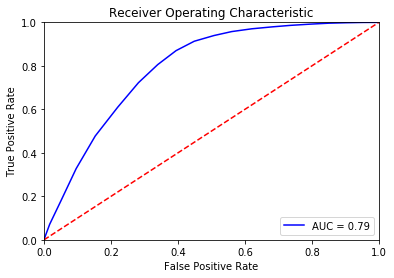

In [10]:
# parameters = {'n_neighbors':[1, 2, 5, 10, 20, 50], 'p': [1, 2]}
# knn_clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10)
# knn_clf.fit(train_classification_set, train_classification_target)
# print(knn_clf.best_estimator_)

knn_clf = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', leaf_size=30, 
                            p=1, metric='minkowski', metric_params=None, n_jobs=None)
knn_clf.fit(train_classification_set, train_classification_target)

print(accuracy_score(knn_clf.predict(train_classification_set),train_classification_target))
print(accuracy_score(knn_clf.predict(test_classification_set),test_classification_target))

report = classification_report(test_classification_target, knn_clf.predict(test_classification_set), target_names=['failed', 'successful'], output_dict=True)
print(json.dumps(report, indent=2))

auc = roc_auc_score(test_classification_target, knn_clf.predict(test_classification_set))
print(auc)

plot_roc_curve(knn_clf, test_classification_set, test_classification_target)

[learning_curve] Training set sizes: [  498  1505  2511  3518  4525  5532  6538  7545  8552  9559 10565 11572
 12579 13586 14593 15599 16606 17613 18620 19626 20633 21640 22647 23653
 24660 25667 26674 27681 28687 29694 30701 31708 32714 33721 34728 35735
 36741 37748 38755 39762 40769 41775 42782 43789 44796 45802 46809 47816
 48823 49830]
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ , score=(train=0.745, test=0.697), total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................ , score=(train=0.759, test=0.716), total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ................ , score=(train=0.762, test=0.728), total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] ................ , score=(train=0.765, test=0.729), total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


[CV] ................ , score=(train=0.766, test=0.736), total=   0.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.773, test=0.740), total=   0.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.773, test=0.742), total=   0.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.779, test=0.750), total=   0.5s
[CV]  ................................................................
[CV] ................ , score=(train=0.778, test=0.751), total=   0.5s
[CV]  ................................................................
[CV] ................ , score=(train=0.777, test=0.754), total=   0.5s
[CV]  ................................................................
[CV] ................ , score=(train=0.781, test=0.758), total=   0.5s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 37.6min finished


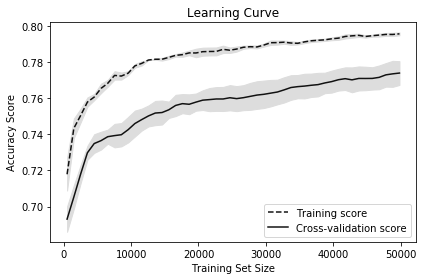

In [0]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', leaf_size=30, 
                            p=1, metric='minkowski', metric_params=None, n_jobs=None), 
                                                        train_classification_set, 
                                                        train_classification_target,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        # n_jobs=-1, 
                                                        verbose=5,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

0.7920459471174686
0.7911428984250831
{
  "failed": {
    "precision": 0.7433366238894373,
    "recall": 0.6193707587908698,
    "f1-score": 0.6757150869321368,
    "support": 4863
  },
  "successful": {
    "precision": 0.810929519918284,
    "recall": 0.8841741842075955,
    "f1-score": 0.8459694176567746,
    "support": 8979
  },
  "accuracy": 0.7911428984250831,
  "macro avg": {
    "precision": 0.7771330719038607,
    "recall": 0.7517724714992327,
    "f1-score": 0.7608422522944557,
    "support": 13842
  },
  "weighted avg": {
    "precision": 0.787182644221977,
    "recall": 0.7911428984250831,
    "f1-score": 0.786155314903277,
    "support": 13842
  }
}
0.7517724714992328


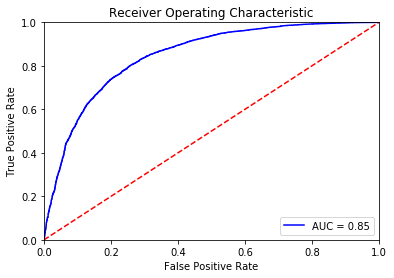

In [11]:
# parameters = [
#   {
#     'penalty': ['l1'], 
#     'C': [0.01, 0.1, 1, 10, 100],  
#     'class_weight': [None, 'balanced'],
#     'solver': ['liblinear']  
#   },
#   {
#     'penalty': ['l2'], 
#     'C': [0.01, 0.1, 1, 10, 100],  
#     'class_weight': [None, 'balanced'], 
#     'solver': ['lbfgs', 'liblinear']  
#   }
# ]
# lr_clf = GridSearchCV(LogisticRegression(max_iter=10000), parameters, cv=10, verbose=4)
# lr_clf.fit(train_classification_set, train_classification_target)
# print(lr_clf.best_estimator_)

# # penalty = lr_clf.best_estimator_.penalty
# # C = lr_clf.best_estimator_.C
# # solver = lr_clf.best_estimator_.solver
# # class_weight = lr_clf.best_estimator_.class_weight

# # lr_clf = call_logisticregression_classify(train_classification_set, train_classification_target, penalty, C, solver, class_weight)

lr_clf = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr_clf.fit(train_classification_set, train_classification_target)

print(accuracy_score(lr_clf.predict(train_classification_set),train_classification_target))
print(accuracy_score(lr_clf.predict(test_classification_set),test_classification_target))

report = classification_report(test_classification_target, lr_clf.predict(test_classification_set), target_names=['failed', 'successful'], output_dict=True)
print(json.dumps(report, indent=2))

auc = roc_auc_score(test_classification_target, lr_clf.predict(test_classification_set))
print(auc)

plot_roc_curve(lr_clf, test_classification_set, test_classification_target)

[learning_curve] Training set sizes: [  498  1505  2511  3518  4525  5532  6538  7545  8552  9559 10565 11572
 12579 13586 14593 15599 16606 17613 18620 19626 20633 21640 22647 23653
 24660 25667 26674 27681 28687 29694 30701 31708 32714 33721 34728 35735
 36741 37748 38755 39762 40769 41775 42782 43789 44796 45802 46809 47816
 48823 49830]
[CV]  ................................................................
[CV] ................ , score=(train=0.781, test=0.723), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.802, test=0.767), total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................ , score=(train=0.804, test=0.780), total=   0.1s
[CV]  ................................................................
[CV] ................ , score=(train=0.795, test=0.777), total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


[CV] ................ , score=(train=0.798, test=0.779), total=   0.2s
[CV]  ................................................................
[CV] ................ , score=(train=0.798, test=0.779), total=   0.2s
[CV]  ................................................................
[CV] ................ , score=(train=0.797, test=0.784), total=   0.3s
[CV]  ................................................................
[CV] ................ , score=(train=0.800, test=0.789), total=   0.3s
[CV]  ................................................................
[CV] ................ , score=(train=0.799, test=0.788), total=   0.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.798, test=0.789), total=   0.4s
[CV]  ................................................................
[CV] ................ , score=(train=0.797, test=0.786), total=   0.4s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.0min finished


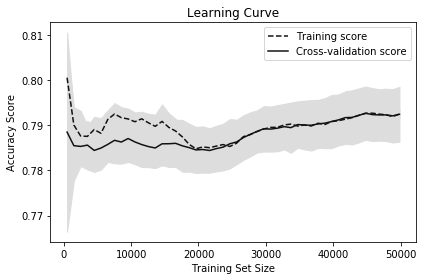

In [0]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 
                                                        train_classification_set, 
                                                        train_classification_target,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        # n_jobs=-1, 
                                                        verbose=5,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [8]:
# parameters = {'alpha': 10.0 ** -np.arange(1, 5), 'l1_ratio': [0.1, 0.5, 0.9]}
# elastic_reg = GridSearchCV(ElasticNet(), parameters, cv=10)
# elastic_reg.fit(train_regression_set_scaled, train_regression_target)
# print(elastic_reg.best_estimator_)

# # alpha = elastic_reg.best_estimator_.alpha
# # l1_ratio = elastic_reg.best_estimator_.l1_ratio

# # elastic_reg = call_elastic_reg(train_regression_set, train_regression_target, alpha, l1_ratio)

elastic_reg = ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)
elastic_reg.fit(train_regression_set_scaled, train_regression_target_scaled)

print(mean_squared_error(train_regression_target_scaled, elastic_reg.predict(train_regression_set_scaled)))
print(mean_squared_error(test_regression_target_scaled, elastic_reg.predict(test_regression_set_scaled)))

print(mean_absolute_error(train_regression_target_scaled, elastic_reg.predict(train_regression_set_scaled)))
print(mean_absolute_error(test_regression_target_scaled, elastic_reg.predict(test_regression_set_scaled)))

print(elastic_reg.score(train_regression_set_scaled, train_regression_target_scaled))
print(elastic_reg.score(test_regression_set_scaled, test_regression_target_scaled))

# print(elastic_reg.explained_variance_score(train_regression_set_scaled, train_regression_target))
# print(elastic_reg.explained_variance_score(test_regression_set_scaled, test_regression_target))

# pred = elastic_reg.predict(test_set)
# res = np.zeros(pred.shape)
# res[pred >= test_regression_target] = 1
# res[pred < test_regression_target] = -1
# print(np.sum(res == test_classification_target)/len(test))

0.14125297462768033
0.13614100784036098
0.23437918682883993
0.23434913605140975
0.8587470253723196
0.8638589921596391


[learning_curve] Training set sizes: [  326   987  1647  2308  2968  3629  4289  4949  5610  6270  6931  7591
  8252  8912  9572 10233 10893 11554 12214 12875 13535 14195 14856 15516
 16177 16837 17498 18158 18818 19479 20139 20800 21460 22121 22781 23441
 24102 24762 25423 26083 26744 27404 28064 28725 29385 30046 30706 31367
 32027 32688]
[CV]  ................................................................
[CV] ................ , score=(train=0.902, test=0.843), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.865, test=0.847), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.871, test=0.851), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.862, test=0.851), total=   0.0s
[CV]  ................................................................
[CV] .............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ................ , score=(train=0.858, test=0.854), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.858, test=0.854), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.858, test=0.854), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.858, test=0.854), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.859, test=0.854), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.858, test=0.854), total=   0.0s
[CV]  ................................................................
[CV] ................ , score=(train=0.859, test=0.854), total=   0.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   12.4s finished


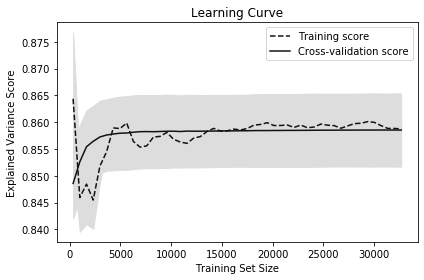

In [10]:
train_sizes, train_scores, test_scores = learning_curve(ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False), 
                                                        train_regression_set_scaled, 
                                                        train_regression_target_scaled,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='explained_variance',
                                                        # Use all computer cores
                                                        # n_jobs=-1, 
                                                        verbose=5,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Explained Variance Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [16]:
# Some technical jargon to set up tensorflow session for keras and make it use the GPU
import tensorflow as tf
import keras
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 1} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.optimizers import *
from keras.callbacks import EarlyStopping

# Seed initializations
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10




55368/55368 [==============================] - 8s 153us/step - loss: 1.0521 - acc: 0.6750
Epoch 2/10
55368/55368 [==============================] - 5s 97us/step - loss: 0.7048 - acc: 0.7415
Epoch 3/10
55368/55368 [==============================] - 5s 99us/step - loss: 0.5956 - acc: 0.7869
Epoch 4/10
55368/55368 [==============================] - 6s 100us/step - loss: 0.5228 - acc: 0.8108
Epoch 5/10
55368/55368 [==============================] - 6s 100us/step - loss: 0.4572 - acc: 0.8283
Epoch 6/10
55368/55368 [==============================] - 6s 100us/step - loss: 0.4443 - acc: 0.8292
Epoch 7/10
55368/55368 [==============================] - 6s 102us/step - loss: 0.4183 - acc: 0.8375
Epoch 8/10
55368/55368 [==============================] - 6s 102us/step - loss: 0.4068 - acc: 0.8415
Epoch 9/10
55368/55368 [==============================] - 6s 100us/step - loss: 0.4029 - 

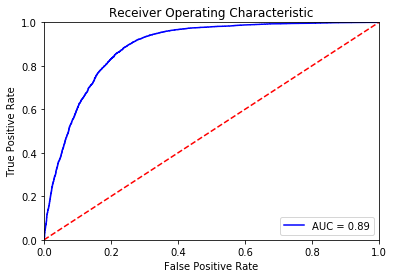

In [17]:
def create_classifier(hidden_nodes, learn_rate, input_dim=train_classification_set.shape[1]):
  
  model = Sequential()
  model.add(Dense(hidden_nodes[0], activation='relu', input_shape=(input_dim,))) 

  for layer_size in hidden_nodes[1:]:
      model.add(Dense(layer_size, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  optimizer = Adam(lr=learn_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

# hidden = [x for x in itertools.product((20,50,100),repeat=1)]
# hidden.extend([x for x in itertools.product((20,50,100),repeat=2)])

# parameters = {
# 	'epochs': [10, 1],
# 	'hidden_nodes': hidden,
# 	'learn_rate': [0.001, 0.01, 0.1]
# }

# keras_classifier = KerasClassifier(build_fn=create_classifier, verbose=1)

# nn_clf = GridSearchCV(keras_classifier, parameters, cv=5, verbose=5)
# nn_clf.fit(train_classification_set, train_classification_target)
# print(nn_clf.best_params_)

nn_clf = KerasClassifier(build_fn=create_classifier, hidden_nodes=(50, 100), learn_rate=0.001, verbose=1)
nn_clf.fit(train_classification_set, train_classification_target, batch_size=32, epochs=10)

train_accuracy = accuracy_score(nn_clf.predict(train_classification_set),np.array([0 if i==-1 else 1 for i in train_classification_target]))
test_accuracy = accuracy_score(nn_clf.predict(test_classification_set),np.array([0 if i==-1 else 1 for i in test_classification_target]))

print(train_accuracy)
print(test_accuracy)

report = classification_report(test_classification_target, nn_clf.predict(test_classification_set), target_names=['failed', 'successful'], output_dict=True)
print(json.dumps(report, indent=2))

# report = classification_report(np.array([0 if i==-1 else 1 for i in test_classification_target]), nn_clf.predict(test_classification_set), target_names=['failed', 'successful'], output_dict=True)
# print(json.dumps(report, indent=2))

auc = roc_auc_score(test_classification_target, nn_clf.predict(test_classification_set))
print(auc)

plot_roc_curve(nn_clf, test_classification_set, test_classification_target)

# auc = roc_auc_score(np.array([0 if i==-1 else 1 for i in test_classification_target]), nn_clf.predict(test_classification_set))
# print(auc)

# np.save({'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy, 'auc': auc}, 'scores.npy')
# np.save(report, 'report.npy')

[learning_curve] Training set sizes: [  442  1337  2232  3127  4022  4917  5812  6707  7602  8497  9392 10287
 11181 12076 12971 13866 14761 15656 16551 17446 18341 19236 20131 21026
 21921 22815 23710 24605 25500 26395 27290 28185 29080 29975 30870 31765
 32660 33554 34449 35344 36239 37134 38029 38924 39819 40714 41609 42504
 43399 44294]
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/1
442/442 [==============================] - 0s 34us/step
[CV] ................ , score=(train=0.686, test=0.645), total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Epoch 1/1
1337/1337 [==============================] - 0s 28us/step
[CV] ................ , score=(train=0.687, test=0.690), total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


Epoch 1/1
2232/2232 [==============================] - 0s 28us/step
[CV] ................ , score=(train=0.663, test=0.676), total=   1.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s remaining:    0.0s


Epoch 1/1
3127/3127 [==============================] - 0s 28us/step
[CV] ................ , score=(train=0.729, test=0.727), total=   1.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.9s remaining:    0.0s


Epoch 1/1
4022/4022 [==============================] - 0s 29us/step
[CV] ................ , score=(train=0.724, test=0.726), total=   2.0s
[CV]  ................................................................
Epoch 1/1
4917/4917 [==============================] - 0s 30us/step
[CV] ................ , score=(train=0.681, test=0.681), total=   2.1s
[CV]  ................................................................
Epoch 1/1
5812/5812 [==============================] - 0s 29us/step
[CV] ................ , score=(train=0.553, test=0.553), total=   2.4s
[CV]  ................................................................
Epoch 1/1
6707/6707 [==============================] - 0s 31us/step
[CV] ................ , score=(train=0.681, test=0.675), total=   2.5s
[CV]  ................................................................
Epoch 1/1
7602/7602 [==============================] - 0s 29us/step
[CV] ................ , score=(train=0.736, test=0.740), total=   2.7s
[CV]  ...............

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 86.0min finished


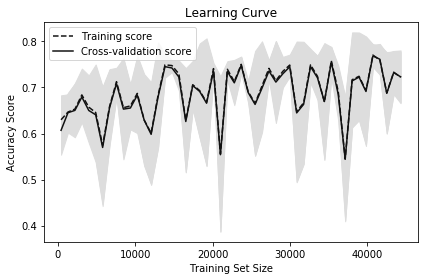

In [8]:
train_sizes, train_scores, test_scores = learning_curve(KerasClassifier(build_fn=create_classifier, hidden_nodes=(50, 100), learn_rate=0.001, verbose=1), 
                                                        train_classification_set, 
                                                        train_classification_target,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        # n_jobs=-1, 
                                                        verbose=5,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [18]:
def create_regressor(hidden_nodes, learn_rate, input_dim=train_regression_set_scaled.shape[1]):
  
  model = Sequential()
  model.add(Dense(hidden_nodes[0], activation='relu', input_shape=(input_dim,))) 

  for layer_size in hidden_nodes[1:]:
      model.add(Dense(layer_size, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  optimizer = Adam(lr=learn_rate)
  model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
  return model

# keras_regressor = KerasRegressor(build_fn=create_regressor, verbose=1)

# nn_reg = GridSearchCV(keras_regressor, parameters, cv=5, verbose=2)
# nn_reg.fit(train_regression_set_scaled, train_regression_target_scaled, batch_size=32)
# print(nn_reg.best_params_)

nn_reg = KerasRegressor(build_fn=create_regressor, hidden_nodes=(50, 50), learn_rate=0.1, verbose=1)
nn_reg.fit(train_regression_set_scaled, train_regression_target_scaled, epochs=10, batch_size=32, 
           callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)])

print(mean_squared_error(train_regression_target_scaled, nn_reg.predict(train_regression_set_scaled)))
print(mean_squared_error(test_regression_target_scaled, nn_reg.predict(test_regression_set_scaled)))

print(mean_absolute_error(train_regression_target_scaled, nn_reg.predict(train_regression_set_scaled)))
print(mean_absolute_error(test_regression_target_scaled, nn_reg.predict(test_regression_set_scaled)))

print(nn_reg.score(train_regression_set_scaled, train_regression_target_scaled))
print(nn_reg.score(test_regression_set_scaled, test_regression_target_scaled))

Epoch 1/10
36320/36320 [==============================] - 3s 89us/step - loss: 0.8166 - mean_squared_error: 0.8166
Epoch 2/10
 1856/36320 [>.............................] - ETA: 2s - loss: 0.8725 - mean_squared_error: 0.8725

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_squared_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


36320/36320 [==============================] - 3s 85us/step - loss: 1.3411 - mean_squared_error: 1.3411
Epoch 3/10
36320/36320 [==============================] - 3s 86us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 4/10
36320/36320 [==============================] - 3s 86us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 5/10
36320/36320 [==============================] - 3s 86us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 6/10
36320/36320 [==============================] - 3s 87us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 7/10
36320/36320 [==============================] - 3s 86us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 8/10
36320/36320 [==============================] - 3s 86us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 9/10
36320/36320 [==============================] - 3s 86us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 10/10
36320/36320 [==============================] - 1s 21us/step
1.999999999999999
9

In [0]:
# hidden = [x for x in itertools.product((20,50,100),repeat=1)]
# hidden.extend([x for x in itertools.product((20,50,100),repeat=2)])
# hidden.extend([x for x in itertools.product((20,50,100),repeat=3)])

# parameters = [
#   {
#     'hidden_layer_sizes': hidden, 
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs'],
#     'alpha': 10.0 ** -np.arange(1, 5), 
#   },
#   {
#     'hidden_layer_sizes': hidden, 
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['adam'],
#     'alpha': 10.0 ** -np.arange(1, 5),
#     'learning_rate_init': [1, 0.1, 0.01] 
#   },
#   {
#     'hidden_layer_sizes': hidden, 
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['sgd'],
#     'alpha': 10.0 ** -np.arange(1, 5),
#     'learning_rate_init': [1, 0.1, 0.01],
#     'learning_rate': ['constant', 'adaptive']
#   },
# ]

# nn_cv_clf = GridSearchCV(MLPClassifier(), parameters, cv=10)
# nn_cv_clf.fit(train_set, train_classification_target)
# print(nn_cv_clf.best_estimator_)
# hidden_layer_sizes = nn_cv_clf.best_estimator_.hidden_layer_sizes
# activation = nn_cv_clf.best_estimator_.activation
# solver = nn_cv_clf.best_estimator_.solver
# alpha = nn_cv_clf.best_estimator_.alpha
# learning_rate_init = nn_cv_clf.best_estimator_.learning_rate_init
# learning_rate = nn_cv_clf.best_estimator_.learning_rate

# nn_clf = call_neuralnet_classify(train_set, train_classification_target, hidden_layer_sizes, activation, solver, alpha, learning_rate_init, learning_rate)

# print(accuracy_score(nn_clf.predict(train_set),train_classification_target))
# print(accuracy_score(nn_clf.predict(test_set),test_classification_target))

In [0]:
# hidden = [x for x in itertools.product((20,50,100),repeat=1)]
# hidden.extend([x for x in itertools.product((20,50,100),repeat=2)])
# # hidden.extend([x for x in itertools.product((20,50,100),repeat=3)])

# parameters = [
#   {
#     'hidden_layer_sizes': hidden, 
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs'],
#     'alpha': 10.0 ** -np.arange(1, 5), 
#   },
#   {
#     'hidden_layer_sizes': hidden, 
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['adam'],
#     'alpha': 10.0 ** -np.arange(1, 5),
#     'learning_rate_init': [1, 0.1, 0.01] 
#   },
#   {
#     'hidden_layer_sizes': hidden, 
#     'activation': ['logistic', 'tanh', 'relu'],
#     'solver': ['sgd'],
#     'alpha': 10.0 ** -np.arange(1, 5),
#     'learning_rate_init': [1, 0.1, 0.01],
#     'learning_rate': ['constant', 'adaptive']
#   }
# ]

# nn_cv_reg = GridSearchCV(MLPRegressor(max_iter=10000), parameters, cv=10, verbose=5, n_jobs=10)
# nn_cv_reg.fit(train_regression_set, train_regression_target)
# print(nn_cv_reg.best_estimator_)
# hidden_layer_sizes = nn_cv_reg.best_estimator_.hidden_layer_sizes
# activation = nn_cv_reg.best_estimator_.activation
# solver = nn_cv_reg.best_estimator_.solver
# alpha = nn_cv_reg.best_estimator_.alpha
# learning_rate_init = nn_cv_reg.best_estimator_.learning_rate_init
# learning_rate = nn_cv_reg.best_estimator_.learning_rate

# nn_reg = call_neuralnet_reg(train_regression_set, train_regression_target, hidden_layer_sizes, activation, solver, alpha, learning_rate_init, learning_rate)

# print(mean_squared_error(train_regression_target, nn_reg.predict(train_regression_set)))
# print(mean_squared_error(test_regression_target, nn_reg.predict(test_regression_set)))

# # pred = nn_reg.predict(test_set)
# # res = np.zeros(pred.shape)
# # res[pred >= test_regression_target] = 1
# # res[pred < test_regression_target] = -1
# # print(np.sum(res == test_classification_target)/len(test))

In [0]:
# Some technical jargon to set up tensorflow session for keras and make it use the GPU
import tensorflow as tf
import keras
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 1} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.optimizers import *

hidden = [x for x in itertools.product((20,50,100),repeat=1)]
hidden.extend([x for x in itertools.product((20,50,100),repeat=2)])

parameters = [
    {
        'epochs': [10, 1],
        'hidden_nodes': hidden,
        'optimizer': [Adam(lr=0.001), Adam(lr=0.01), Adam(lr=0.1)],
        'activation': ['sigmoid', 'tanh', 'relu']
    },
    {
        'epochs': [10, 1],
        'hidden_nodes': hidden,
        'optimizer': [
              SGD(lr=0.001, momentum=0.0),
              SGD(lr=0.01, momentum=0.0),
              SGD(lr=0.1, momentum=0.0),
              SGD(lr=0.001, momentum=0.5),
              SGD(lr=0.01, momentum=0.5),
              SGD(lr=0.1, momentum=0.5)
        ],
        'activation': ['sigmoid', 'tanh', 'relu']
    }
]

In [0]:
def create_classifier(hidden_nodes, activation, optimizer, input_dim=train_classification_set.shape[1]):
  
  model = Sequential()
  model.add(Dense(hidden_nodes[0], activation=activation, input_shape=(input_dim,))) 

  for layer_size in hidden_nodes[1:]:
      model.add(Dense(layer_size, activation=activation))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

keras_classifier = KerasClassifier(build_fn=create_classifier, verbose=1)

nn_clf = GridSearchCV(keras_classifier, parameters, cv=10, verbose=2)
nn_clf.fit(train_classification_set, train_classification_target, batch_size=32)
print(nn_clf.best_estimator_)

print(accuracy_score(nn_clf.predict(train_classification_set),train_classification_target))
print(accuracy_score(nn_clf.predict(test_classification_set),test_classification_target))

report = classification_report(test_classification_target, nn_clf.predict(test_classification_set), target_names=['failed', 'successful'], output_dict=True)
print(json.dumps(report, indent=2))

auc = roc_auc_score(test_classification_target, nn_clf.predict(test_classification_set))
print(auc)